In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import re 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

In [5]:
#loading first dataset
df1 = pd.read_csv("C:/Users/Lithium/Downloads/mental health/mental-illnesses-prevalence.csv")
df1.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [6]:
# loading rest of the dataframes
df2 = pd.read_csv("C:/Users/Lithium/Downloads/mental health/disease-burden-from-ncds.csv") #extract DALY col
df3 = pd.read_csv("C:/Users/Lithium/Downloads/mental health/schizophrenia-prevalence-males-vs-females.csv")
df4 = pd.read_csv("C:/Users/Lithium/Downloads/mental health/depressive-disorders-prevalence-males-vs-females.csv")
df5 = pd.read_csv("C:/Users/Lithium/Downloads/mental health/anxiety-disorders-prevalence-males-vs-females.csv")
df6 = pd.read_csv("C:/Users/Lithium/Downloads/mental health/bipolar-disorder-prevalence-males-vs-females.csv")
df7 = pd.read_csv("C:/Users/Lithium/Downloads/mental health/eating-disorders-prevalence-males-vs-females (1).csv")


In [7]:
#checking number of rows and columns
df1.shape
df2.shape
df3.shape
df4.shape
df5.shape
df6.shape
df7.shape


(6420, 8)

(6840, 15)

(58420, 7)

(58420, 7)

(58420, 7)

(58420, 7)

(58420, 7)

In [8]:
df8= pd.read_csv("C:/Users/Lithium/Downloads/mental health/suicide-death-rates.csv")
df8.shape

(6840, 4)

In [9]:
#Cleaning dataframes and making them homogeneous for merging..
# removing duplicate entries and groupings
remove = ['Europe (IHME GBD)', 'Asia (IHME GBD)', 'Africa (IHME GBD)', 'America (IHME GBD)', 'European Union (27)','World',
         'Africa (UN)','Asia (UN)','Europe (UN)','Northern America (UN)','Oceania (UN)','African Region (WHO)',
         'Eastern Mediterranean Region (WHO)','Europe & Central Asia (WB)','East Asia & Pacific (WB)',
         'Latin America & Caribbean (WB)','Middle East & North Africa (WB)','Region of the Americas (WHO)',
         'South Asia (WB)','South-East Asia Region (WHO)','Sub-Saharan Africa (WB)','Western Pacific Region (WHO)',
         'European Region (WHO)','North America (WB)','World Bank High Income','World Bank Upper Middle Income',
         'World Bank Lower Middle Income','World Bank Low Income','Upper-middle-income countries',
         'OECD Countries','G20','Wales','Scotland','England','Northern Ireland','Lower-middle-income countries',
         'Low-income countries','High-income countries','Ethiopia (former)',] 

dataframes = [df1, df2, df3, df4, df5, df6, df7,df8]

for df in dataframes:
    df.drop(df[df["Entity"].isin(remove)].index, inplace=True)
    
# removing wrong entries and years outside our study range
valid_years = list(range(1990, 2020))  # Years from 1990 to 2019

for df in dataframes:
    df.drop(df[~df["Year"].isin(valid_years)].index, inplace=True)
    

In [10]:
#since the columns are not equal in all the datasets, checking the difference
unique_entities_df3 = set(df3['Entity'].unique())
unique_entities_df1 = set(df1['Entity'].unique())

difference = unique_entities_df3-unique_entities_df1 

#difference

dataframes1 = [df3, df4, df5, df6, df7,df8]  

for df in dataframes1:
    df.drop(df[df["Entity"].isin(difference)].index, inplace=True)   

for df in dataframes1:
    df.drop(df[df["Code"] == 'OWID_ABK'].index, inplace=True)  
    
for df in dataframes:
    df.reset_index(drop=True, inplace=True)    # resetting index

In [8]:
#checking again
df1.shape
df2.shape
df3.shape
df4.shape
df5.shape
df6.shape
df7.shape
df8.shape

(6120, 8)

(6120, 15)

(6120, 7)

(6120, 7)

(6120, 7)

(6120, 7)

(6120, 7)

(6120, 4)

In [11]:

# Selecting the specific columns from df2 to df7 to merge
selected_columns = [df3.iloc[:, 3:5], df4.iloc[:, 3:5], df5.iloc[:, 3:5], df6.iloc[:, 3:5], df7.iloc[:, 3:5],
                   df2.iloc[:,4] ,df8.iloc[:, 3] ]

merged_df = pd.concat([df1] + selected_columns, axis=1)

merged_df.head(10)


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Schizophrenia disorders (share of population) - Sex: Male - Age: Age-standardized,Schizophrenia disorders (share of population) - Sex: Female - Age: Age-standardized,Depressive disorders (share of population) - Sex: Male - Age: Age-standardized,Depressive disorders (share of population) - Sex: Female - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Male - Age: All ages,Anxiety disorders (share of population) - Sex: Female - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Male - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Female - Age: Age-standardized,Eating disorders (share of population) - Sex: Male - Age: Age-standardized,Eating disorders (share of population) - Sex: Female - Age: Age-standardized,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700,0.236230,0.212065,4.153338,5.750400,3.171290,5.859872,0.653763,0.748123,0.088487,0.161867,198388.06,8.28
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256,0.235572,0.211079,4.158332,5.745472,3.147459,5.870557,0.653763,0.748123,0.086048,0.156910,217795.27,8.17
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844,0.234868,0.210085,4.165729,5.743851,3.123461,5.879532,0.653763,0.748123,0.083625,0.152412,250359.35,8.14
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089,0.234142,0.209100,4.172712,5.740309,3.092839,5.886538,0.653763,0.748123,0.081628,0.147938,274088.72,8.23
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815,0.233418,0.208137,4.177632,5.740277,3.054925,5.891319,0.653763,0.748123,0.079439,0.143980,285538.63,8.36
5,Afghanistan,AFG,1995,0.219409,4.978228,4.668100,0.699768,0.108507,0.232720,0.207213,4.180193,5.740992,3.021812,5.893616,0.653763,0.748123,0.077483,0.139569,297162.18,8.41
6,Afghanistan,AFG,1996,0.218465,4.981489,4.665759,0.699650,0.105269,0.231811,0.206160,4.183916,5.745128,3.000114,5.892675,0.653763,0.748123,0.075320,0.135482,309381.26,8.46
7,Afghanistan,AFG,1997,0.217286,4.987593,4.665013,0.699597,0.101531,0.230603,0.204938,4.189474,5.751506,2.990585,5.889054,0.653763,0.748123,0.072409,0.130966,320667.20,8.53
8,Afghanistan,AFG,1998,0.216074,4.996858,4.668240,0.699765,0.098050,0.229350,0.203749,4.195342,5.760395,2.986912,5.884454,0.653763,0.748123,0.070070,0.126300,326394.45,8.58
9,Afghanistan,AFG,1999,0.215068,5.004257,4.673557,0.700054,0.095723,0.228303,0.202796,4.198021,5.767367,2.990464,5.880579,0.653763,0.748123,0.068276,0.123296,327980.99,8.70


In [12]:
merged_df.shape # final dataset 

(6120, 20)

In [13]:
null_counts = merged_df.isnull().sum() # checking for missing values
null_counts

Entity                                                                                            0
Code                                                                                              0
Year                                                                                              0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized                 0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized                    0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized                       0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized                       0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized                        0
Schizophrenia disorders (share of population) - Sex: Male - Age: Age-standardized                 0
Schizophrenia disorders (share of population) - Sex: Female - Age: Age-standardized               0


In [14]:
# Renaming columns for better readabolity

column_mapping = {
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety disorders',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar disorders',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating disorders',
    'Schizophrenia disorders (share of population) - Sex: Male - Age: Age-standardized': 'Schizophrenia disorders(Male)',
    'Schizophrenia disorders (share of population) - Sex: Female - Age: Age-standardized': 'Schizophrenia disorders(Female)',
    'Depressive disorders (share of population) - Sex: Male - Age: Age-standardized': 'Depressive disorders(Male)',
    'Depressive disorders (share of population) - Sex: Female - Age: Age-standardized': 'Depressive disorders(Female)',
    'Anxiety disorders (share of population) - Sex: Male - Age: All ages': 'Anxiety disorders(Male)', 
    'Anxiety disorders (share of population) - Sex: Female - Age: Age-standardized': 'Anxiety disorders(Female)',
    'Bipolar disorders (share of population) - Sex: Male - Age: Age-standardized': 'Bipolar disorders(Male)',
    'Bipolar disorders (share of population) - Sex: Female - Age: Age-standardized': 'Bipolar disorders(Female)',
    'Eating disorders (share of population) - Sex: Male - Age: Age-standardized': 'Eating disorders(Male)',
    'Eating disorders (share of population) - Sex: Female - Age: Age-standardized': 'Eating disorders(Female)',
    'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Number)': 'DALYs',
    'Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)': 'Deaths(Self-harm)',
}

# Rename the columns
merged_df.rename(columns=column_mapping, inplace=True)



In [15]:
merged_df.columns # checking new names of the columns

Index(['Entity', 'Code', 'Year', 'Schizophrenia disorders',
       'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders',
       'Eating disorders', 'Schizophrenia disorders(Male)',
       'Schizophrenia disorders(Female)', 'Depressive disorders(Male)',
       'Depressive disorders(Female)', 'Anxiety disorders(Male)',
       'Anxiety disorders(Female)', 'Bipolar disorders(Male)',
       'Bipolar disorders(Female)', 'Eating disorders(Male)',
       'Eating disorders(Female)', 'DALYs', 'Deaths(Self-harm)'],
      dtype='object')

In [16]:
# summary statistics of the data
summary_df = merged_df.drop(["Entity", "Code","Year"], axis=1)

summary_df.describe()


,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders,Schizophrenia disorders(Male),Schizophrenia disorders(Female),Depressive disorders(Male),Depressive disorders(Female),Anxiety disorders(Male),Anxiety disorders(Female),Bipolar disorders(Male),Bipolar disorders(Female),Eating disorders(Male),Eating disorders(Female),DALYs,Deaths(Self-harm)
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000
mean,0.265919,3.767415,4.100213,0.639102,0.195125,0.277015,0.254547,2.973645,4.543943,3.017857,5.113529,0.599583,0.679297,0.119725,0.272778,5.078440e+05,12.109850
std,0.039322,0.941734,1.063017,0.235847,0.139367,0.043308,0.036552,0.816719,1.139502,0.792389,1.479352,0.204204,0.270074,0.069741,0.216237,1.880553e+06,8.646566
min,0.188416,1.522333,1.879996,0.181667,0.044780,0.191956,0.183848,1.197908,1.854329,1.334766,2.334763,0.174869,0.187932,0.033360,0.056762,1.586000e+01,1.630000
25%,0.241704,3.061522,3.424497,0.521333,0.095651,0.250633,0.229572,2.438057,3.653975,2.534220,4.143443,0.491392,0.535035,0.070654,0.120069,1.793250e+04,6.350000
50%,0.272780,3.650681,3.942279,0.579331,0.143848,0.282016,0.262475,2.800799,4.499265,2.840185,4.915151,0.576903,0.585780,0.098186,0.186839,9.929404e+04,10.270000
75%,0.285718,4.372005,4.544474,0.857492,0.243725,0.297982,0.275286,3.434141,5.291001,3.403156,5.820622,0.780301,0.923078,0.144382,0.342631,3.194662e+05,15.210000
max,0.462045,7.645899,8.624634,1.506730,1.031688,0.468763,0.460203,6.783981,8.900605,6.180541,11.678872,1.399047,1.607122,0.672270,1.395754,2.189464e+07,90.060000


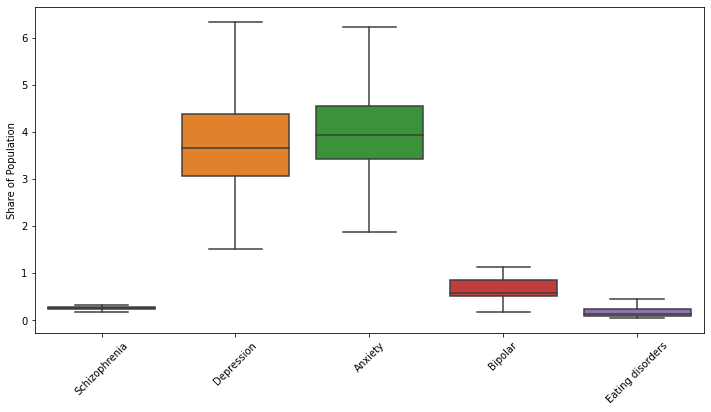

In [17]:

#prevalence columns
prev_columns = ["Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]

disorder_names = [
    'Schizophrenia',
    'Depression',
    'Anxiety',
    'Bipolar',
    'Eating disorders'
]

plt.figure(figsize=(12, 6)) 

sns.boxplot(data=merged_df[prev_columns], showfliers=False)

plt.xticks(range(5), disorder_names, rotation=45)
plt.ylabel("Share of Population")

plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/boxplot.png')
plt.show();




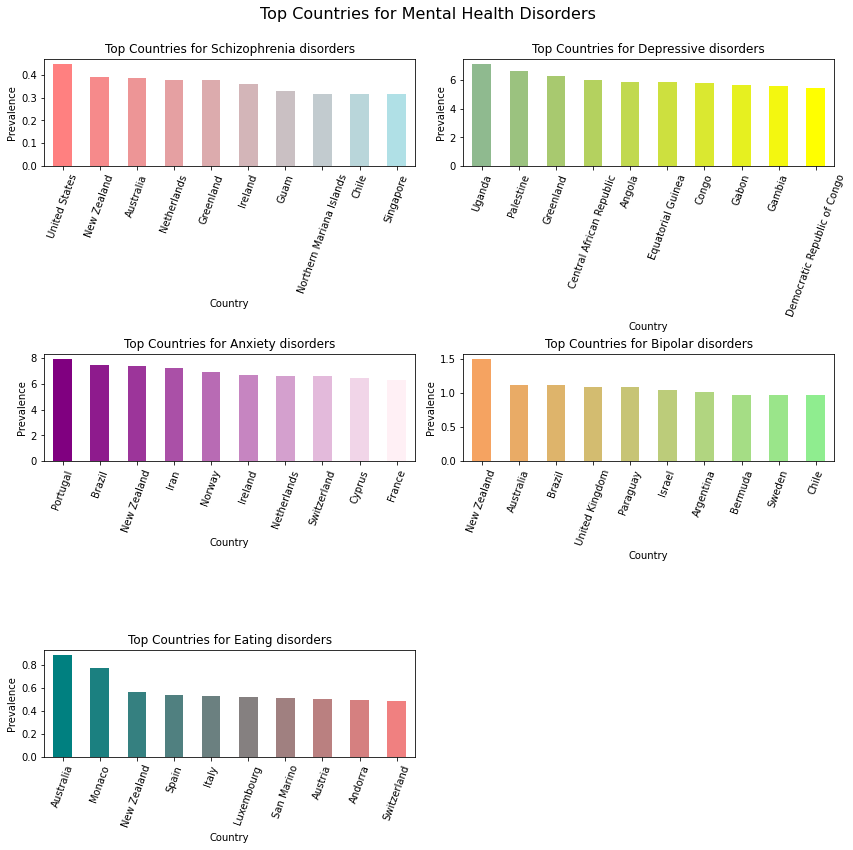

In [21]:
from matplotlib.colors import LinearSegmentedColormap


disorders = ["Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]

colormaps = [
    LinearSegmentedColormap.from_list("salmon_to_skyblue", [(1, 0.5, 0.5), (0.69, 0.88, 0.90)], N=10),
    LinearSegmentedColormap.from_list("green_to_yellow", [(0.56, 0.73, 0.56), (1, 1, 0)], N=10),
    LinearSegmentedColormap.from_list("purple_to_cyan", [(0.5, 0, 0.5), (1, 0.94, 0.96)], N=10),
    LinearSegmentedColormap.from_list("sandybrown_to_green", [(0.96, 0.64, 0.38), (0.56, 0.93, 0.56)], N=10),
    LinearSegmentedColormap.from_list("teal_to_lightcoral", [(0, 0.5, 0.5), (0.94, 0.50, 0.50)], N=10)
]


fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Top Countries for Mental Health Disorders", fontsize=16)


for i, disorder in enumerate(disorders):
    
    selected_disorder = f"{disorder}"

    grouped_data = merged_df.groupby("Entity")[selected_disorder].mean()
    sorted_data = grouped_data.sort_values(ascending=False)

    top_countries = sorted_data.head(10)


    row, col = divmod(i, 2)
    ax = axes[row, col]

    colors = colormaps[i](range(len(top_countries)))
    top_countries.plot(kind="bar", color=colors, ax=ax)
    ax.set_xlabel("Country")
    ax.set_ylabel("Prevalence")
    ax.set_title(f"Top Countries for {disorder}")
    ax.set_xticklabels(top_countries.index, rotation=70)

for i in range(len(disorders), 6):
    fig.delaxes(axes[divmod(i, 2)])

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/top_countries.png')
plt.show();


In [17]:
#trends
count1_df = merged_df.groupby("Year")[["Schizophrenia disorders"]].sum()
count2_df = merged_df.groupby("Year")[["Depressive disorders"]].sum()
count3_df = merged_df.groupby("Year")[["Anxiety disorders"]].sum()
count4_df = merged_df.groupby("Year")[["Bipolar disorders"]].sum()
count5_df = merged_df.groupby("Year")[["Eating disorders"]].sum()
count1_df.head(2)


,Schizophrenia disorders
Year,
1990,54.022902
1991,54.033408


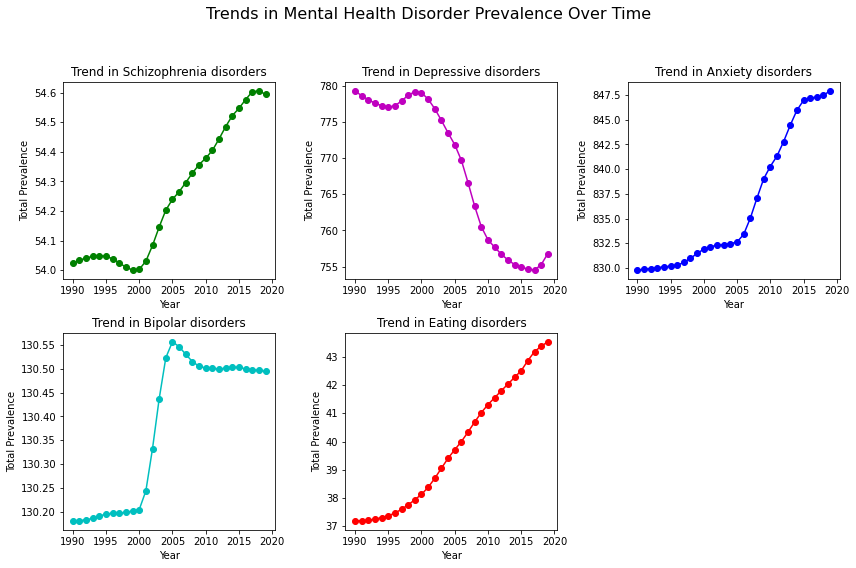

In [22]:
# List of the five mental health disorders and corresponding line colors
disorders = ["Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
line_colors = ["g", "m", "b", "c", "r"]


fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Trends in Mental Health Disorder Prevalence Over Time", fontsize=16)


for i, (disorder, color) in enumerate(zip(disorders, line_colors)):
   
    count_df = merged_df.groupby("Year")[disorder].sum()
    row, col = divmod(i, 3)
    ax = axes[row, col]

    ax.plot(count_df.index, count_df, "o-", label=disorder, color=color)
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Prevalence")
    ax.set_title(f"Trend in {disorder}")

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/temporal_trends.png')
plt.show();


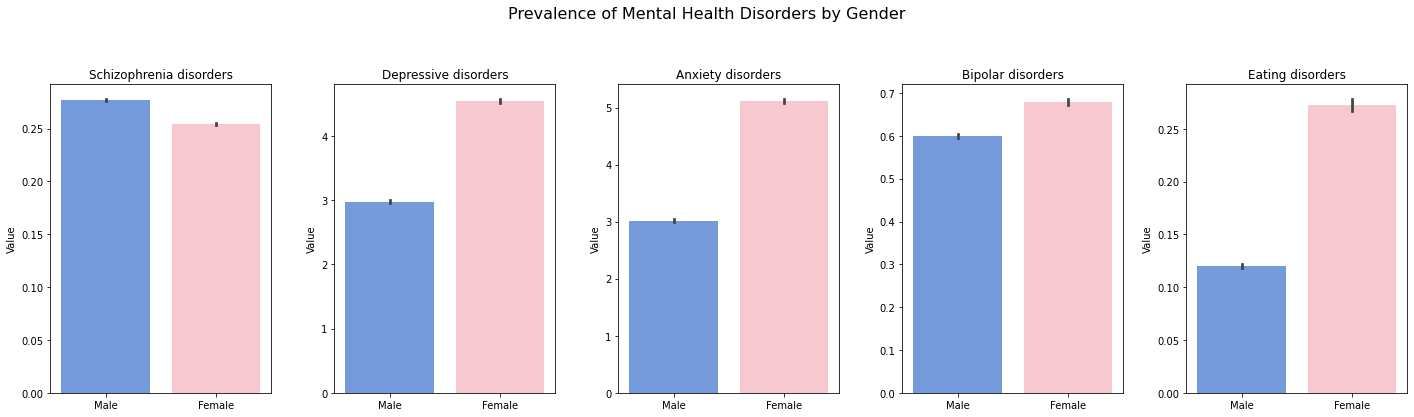

In [23]:
# List of the five mental health disorders   ,  final graph
disorders = ["Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]


male_color = 'cornflowerblue'
female_color = 'pink'

fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle("Prevalence of Mental Health Disorders by Gender", fontsize=16)

# Looping through each disorder
for i, disorder in enumerate(disorders):
    
    disorder_data = merged_df[[f"{disorder}(Male)", f"{disorder}(Female)"]]
    disorder_data.columns = ['Male', 'Female']

    # Melting the data for easier plotting
    disorder_data_melted = disorder_data.melt(var_name='Gender', value_name='Value')
    ax = axes[i]

    sns.barplot(x='Gender', y='Value', data=disorder_data_melted, ax=ax, palette={'Male': male_color, 'Female': female_color})
    ax.set_xlabel('')  
    ax.set_ylabel('Value')
    ax.set_title(f'{disorder}')

    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Male', 'Female'])

fig.text(0.5, 0.04, '', ha='center', fontsize=14)

plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.8)
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/gender_prev.png')
plt.show();


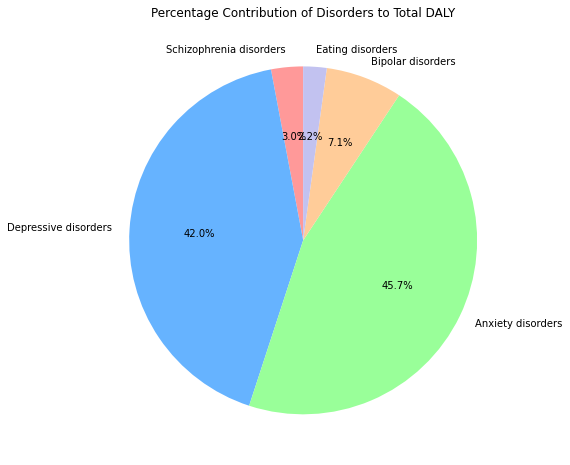

In [24]:

# Selecting the columns for the five disorders and DALY
selected_columns = [
    'Schizophrenia disorders',
    'Depressive disorders',
    'Anxiety disorders',
    'Bipolar disorders',
    'Eating disorders',
    'DALYs'
]

selected_df = merged_df[selected_columns]

prevalence_sum_per_disorder = selected_df.sum()[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']]

total_daly = selected_df['DALYs'].sum()

# Calculating the percentage contribution of each disorder to total DALY
percentage_contribution = (prevalence_sum_per_disorder / total_daly) * 100
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# pie chart with custom colors
labels = percentage_contribution.index
plt.figure(figsize=(10, 8))
plt.pie(percentage_contribution, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage Contribution of Disorders to Total DALY')
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/daly.png')
plt.show();


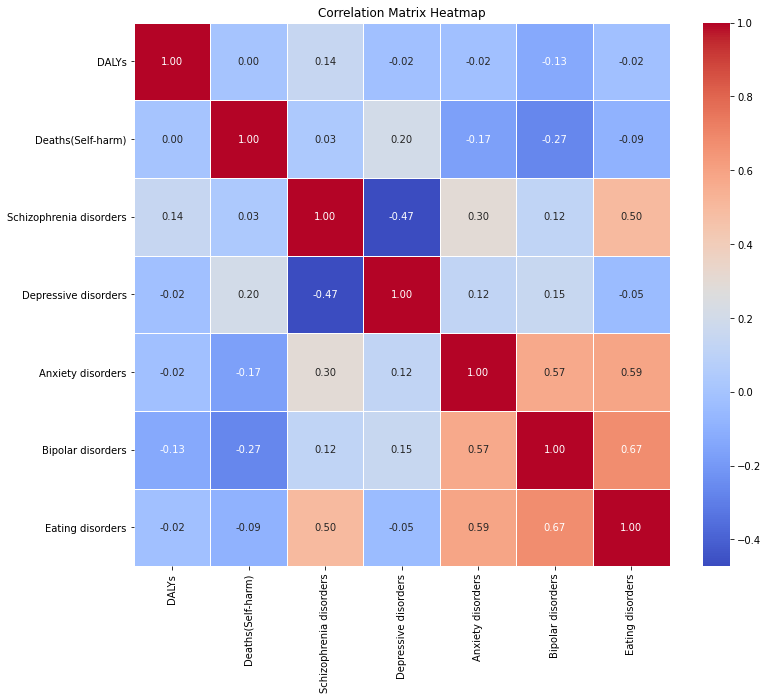

In [25]:


selected_col = merged_df[["DALYs", "Deaths(Self-harm)", "Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]]

# correlation matrix for the selected columns
corr_mat = selected_col.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/corr_mat.png')
plt.show();


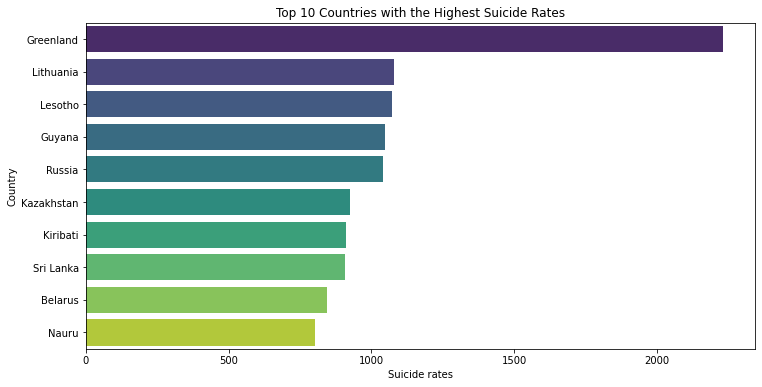

In [26]:
# Self harm ( Death variable analysis: 3 parts)
#part 1:  Top 10 countied for suicide

top_countries = merged_df.groupby('Entity')['Deaths(Self-harm)'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with the Highest Suicide Rates')
plt.xlabel('Suicide rates')
plt.ylabel('Country')
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/suicide_top10.png')
plt.show();

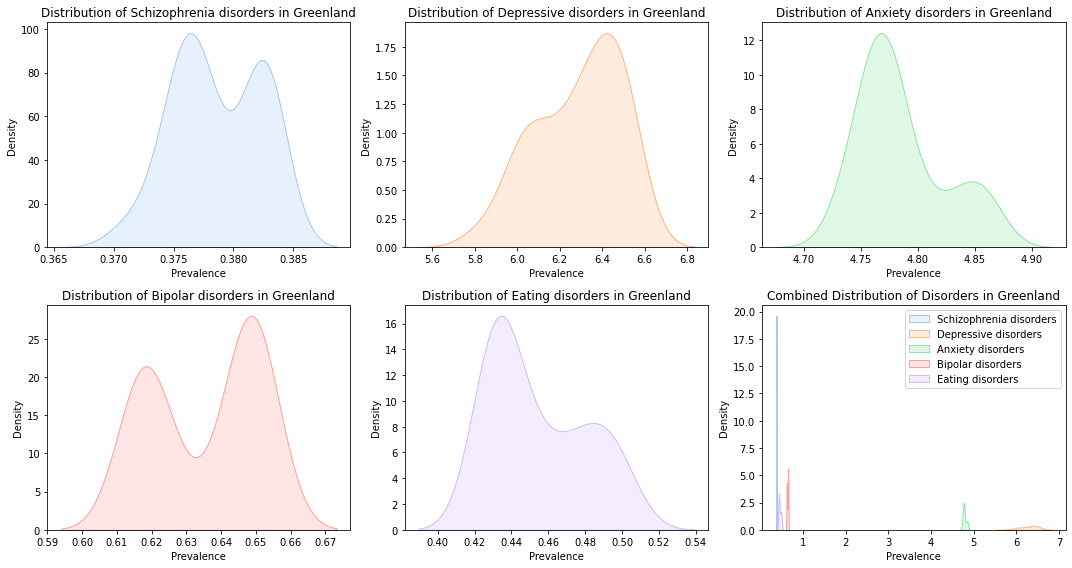

In [27]:

# Filtering data for Greenland
greenland_df = merged_df[merged_df['Entity'] == 'Greenland']

# Selecting the relevant columns for each disorder
disorder_columns = [
    'Schizophrenia disorders',
    'Depressive disorders',
    'Anxiety disorders',
    'Bipolar disorders',
    'Eating disorders',
]

pastel_palette = sns.color_palette("pastel")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, (column, ax) in enumerate(zip(disorder_columns, axes)):
    sns.kdeplot(greenland_df[column], ax=ax, color=pastel_palette[i], fill=True)
    ax.set_title(f'Distribution of {column} in Greenland')
    ax.set_xlabel('Prevalence')
    ax.set_ylabel('Density')

# Creating the combined density plot in the last position of the grid
combined_palette = pastel_palette[:len(disorder_columns)]  # Match the number of colors
sns.kdeplot(data=greenland_df[disorder_columns], ax=axes[-1], fill=True, palette=combined_palette)
axes[-1].set_title('Combined Distribution of Disorders in Greenland')
axes[-1].set_xlabel('Prevalence')
axes[-1].set_ylabel('Density')

plt.tight_layout()
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/greenland_prev.png')
plt.show();


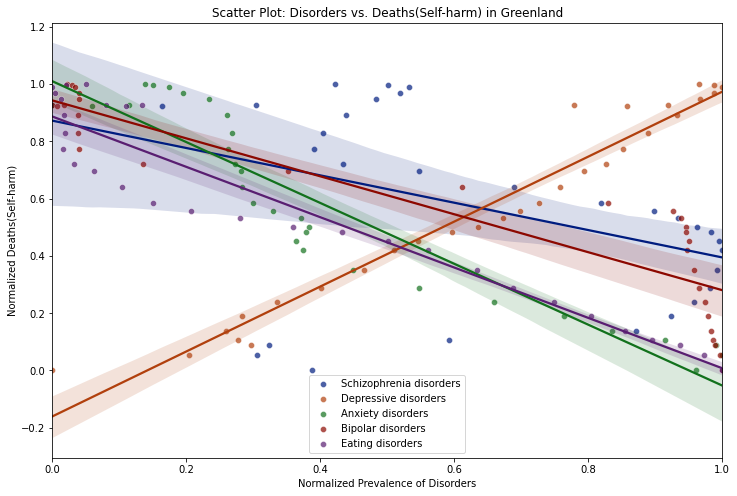

In [28]:

from sklearn.preprocessing import MinMaxScaler

dark_palette = sns.color_palette("dark")

greenland_df = merged_df[merged_df['Entity'] == 'Greenland']

disorder_columns = [
    'Schizophrenia disorders',
    'Depressive disorders',
    'Anxiety disorders',
    'Bipolar disorders',
    'Eating disorders',
    'Deaths(Self-harm)'
]

normalized_df = greenland_df.copy()

# Applying min-max scaling to normalize the selected columns
scaler = MinMaxScaler()
normalized_df[disorder_columns] = scaler.fit_transform(greenland_df[disorder_columns])

plt.figure(figsize=(12, 8))

for i, column in enumerate(disorder_columns[:-1]):
    sns.scatterplot(x=column, y='Deaths(Self-harm)', data=normalized_df, color=dark_palette[i], alpha=0.7, label=column)

    sns.regplot(x=column, y='Deaths(Self-harm)', data=normalized_df, scatter=False, color=dark_palette[i])

plt.title('Scatter Plot: Disorders vs. Deaths(Self-harm) in Greenland')
plt.xlabel('Normalized Prevalence of Disorders')
plt.ylabel('Normalized Deaths(Self-harm)')
plt.legend()
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/norm_green.png')
plt.show();


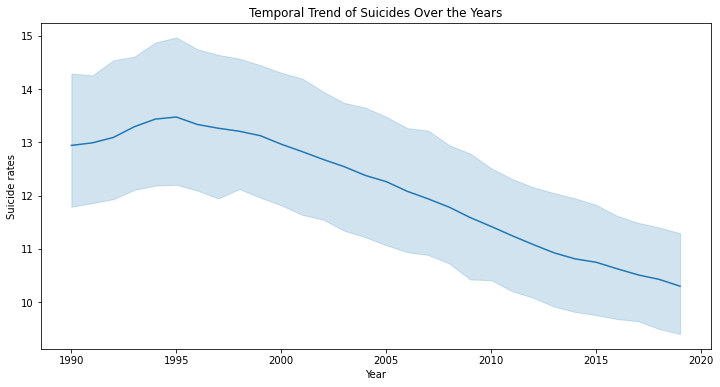

In [29]:
#part 2:     Temporal trend

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Deaths(Self-harm)', data=merged_df)
plt.title('Temporal Trend of Suicides Over the Years')
plt.xlabel('Year')
plt.ylabel('Suicide rates')
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/suicide_trend.png')
plt.show();



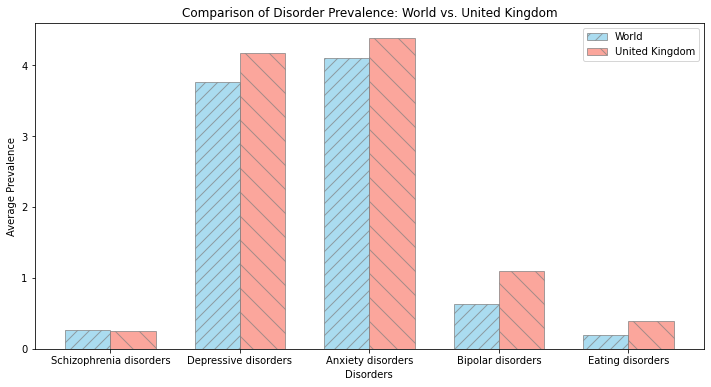

In [30]:

# UK comparison with world part 1:
# Filter data for the World and the United Kingdom
world_df = merged_df[merged_df['Entity'] != 'United Kingdom']
uk_df = merged_df[merged_df['Entity'] == 'United Kingdom']

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35 
index_world = np.arange(len(prev_columns))
index_uk = index_world + bar_width  

# Plotting bars for the World with hatching
ax.bar(index_world, world_df[prev_columns].mean(), width=bar_width, color='skyblue', alpha=0.7, label='World', edgecolor='grey',hatch='//')

# Plotting bars for the United Kingdom with hatching
ax.bar(index_uk, uk_df[prev_columns].mean(), width=bar_width, color='salmon', alpha=0.7, label='United Kingdom',edgecolor='grey', hatch='\\')

ax.set_title('Comparison of Disorder Prevalence: World vs. United Kingdom')
ax.set_xlabel('Disorders')
ax.set_ylabel('Average Prevalence')
ax.set_xticks(index_world + bar_width / 2)  # Center x-ticks between the bars
ax.set_xticklabels(prev_columns)
ax.legend()

# Show the plot
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/uk_prev.png')
plt.show();


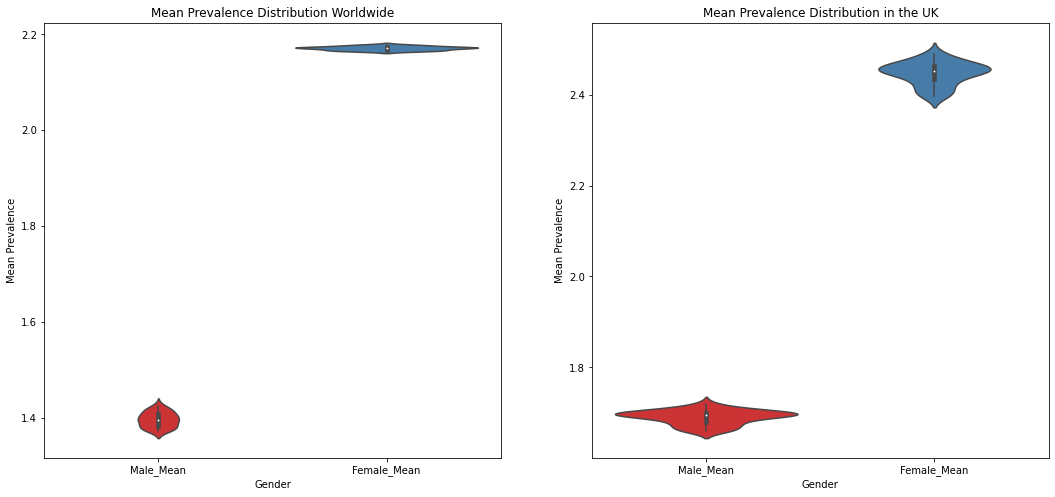

In [31]:
# Uk versus world, part 2
# Selecting the relevant columns for each disorder and gender
male_columns = [
    'Schizophrenia disorders(Male)',
    'Depressive disorders(Male)',
    'Anxiety disorders(Male)',
    'Bipolar disorders(Male)',
    'Eating disorders(Male)',
]

female_columns = [
    'Schizophrenia disorders(Female)',
    'Depressive disorders(Female)',
    'Anxiety disorders(Female)',
    'Bipolar disorders(Female)',
    'Eating disorders(Female)',
]

# Group by Year 
world_mean_data = world_df.groupby('Year').mean().reset_index()

# Calculating the mean for each disorder for males and females
world_male_mean = world_mean_data[male_columns].mean(axis=1)
world_female_mean = world_mean_data[female_columns].mean(axis=1)

world_mean_data = pd.DataFrame({
    'Year': world_mean_data['Year'],
    'Male_Mean': world_male_mean,
    'Female_Mean': world_female_mean,
})
world_mean_melted = world_mean_data.melt(id_vars=['Year'], value_vars=['Male_Mean', 'Female_Mean'], var_name='Gender', value_name='Prevalence')

uk_male_mean = uk_df[male_columns].mean(axis=1)
uk_female_mean = uk_df[female_columns].mean(axis=1)

uk_mean_data = pd.DataFrame({
    'Year': uk_df['Year'],
    'Male_Mean': uk_male_mean,
    'Female_Mean': uk_female_mean,
})

# Melting the DataFrame to convert it to long format
uk_mean_melted = uk_mean_data.melt(id_vars=['Year'], value_vars=['Male_Mean', 'Female_Mean'], var_name='Gender', value_name='Prevalence')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

axes[0].set_title('Mean Prevalence Distribution Worldwide')
sns.violinplot(data=world_mean_melted, x='Gender', y='Prevalence', palette='Set1', ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Mean Prevalence')

axes[1].set_title('Mean Prevalence Distribution in the UK')
sns.violinplot(data=uk_mean_melted, x='Gender', y='Prevalence', palette='Set1', ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Mean Prevalence')
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/uk_gender.png')
plt.show();


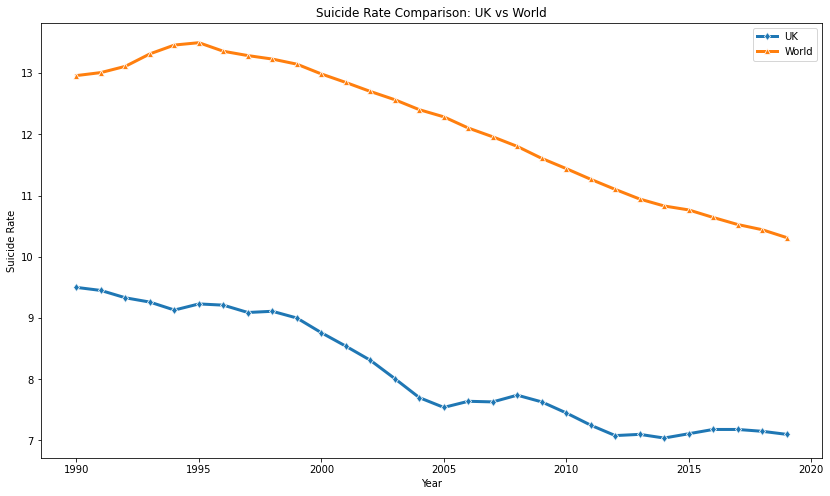

In [32]:

# Filtering data for the World (excluding the UK)
world_df = merged_df[merged_df['Entity'] != 'United Kingdom']

world_suicide_data = world_df.groupby('Year')['Deaths(Self-harm)'].mean().reset_index()

uk_suicide_data = uk_df[['Year', 'Deaths(Self-harm)']]

merged_suicide_data = pd.merge(uk_suicide_data, world_suicide_data, on='Year', suffixes=('_UK', '_World'))

plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_suicide_data, x='Year', y='Deaths(Self-harm)_UK', label='UK',linewidth=3,marker='d')
sns.lineplot(data=merged_suicide_data, x='Year', y='Deaths(Self-harm)_World', label='World',linewidth=3,marker='^')

plt.title('Suicide Rate Comparison: UK vs World')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend()
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/uk_suicide.png')
plt.show();


Two-tailed t-test results for DALYs and suicide:
T-statistic: 21.125653043614726
P-value: 2.4994500032171387e-97


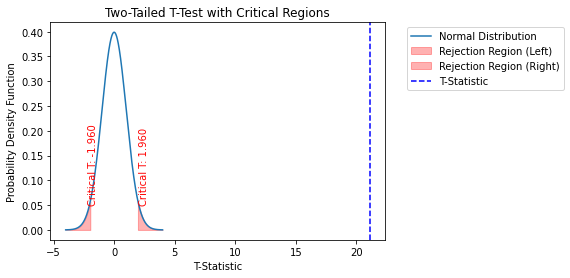

In [34]:
from scipy import stats

from scipy.stats import ttest_ind

merged_df['Total_Disorders'] = merged_df[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']].sum(axis=1)

dalys = merged_df['DALYs']
suicide = merged_df['Deaths(Self-harm)']

# Performing two-tailed t-test
t_statistic, p_value = ttest_ind(dalys, suicide)

print(f'Two-tailed t-test results for DALYs and suicide:\nT-statistic: {t_statistic}\nP-value: {p_value}')

x = np.linspace(-4, 4, 1000)

df = len(dalys) + len(suicide) - 2

alpha = 0.05

# Calculating critical t-value
critical_t = stats.t.ppf(1 - alpha / 2, df)

y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Normal Distribution')

plt.fill_between(x, 0, y, where=(x < -critical_t), color='red', alpha=0.3, label='Rejection Region (Left)')
plt.fill_between(x, 0, y, where=(x > critical_t), color='red', alpha=0.3, label='Rejection Region (Right)')

# t-statistic as a vertical line
plt.axvline(x=t_statistic, color='blue', linestyle='--', label='T-Statistic')

plt.text(-critical_t - 0.2, 0.05, f'Critical T: -{critical_t:.3f}', color='red', rotation='vertical', va='bottom')
plt.text(critical_t + 0.1, 0.05, f'Critical T: {critical_t:.3f}', color='red', rotation='vertical', va='bottom')


plt.title('Two-Tailed T-Test with Critical Regions')
plt.xlabel('T-Statistic')
plt.ylabel('Probability Density Function')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/t-test.png')
plt.show();


In [35]:


merged_df['TotalDisorders'] = merged_df[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']].sum(axis=1)

# Performing one-way ANOVA
from scipy.stats import f_oneway

total_disorders = merged_df['TotalDisorders']
suicide = merged_df['Deaths(Self-harm)']

f_statistic, p_value = f_oneway(total_disorders, suicide)
print(f'One-way ANOVA results:\nF-statistic: {f_statistic}\nP-value: {p_value}')




One-way ANOVA results:
F-statistic: 778.0750917899094
P-value: 4.6354020893820776e-166


Cross-Validation Results of KNN:
Mean RMSE: 2.4111735257882994
Mean R-squared: 0.9219771711919686


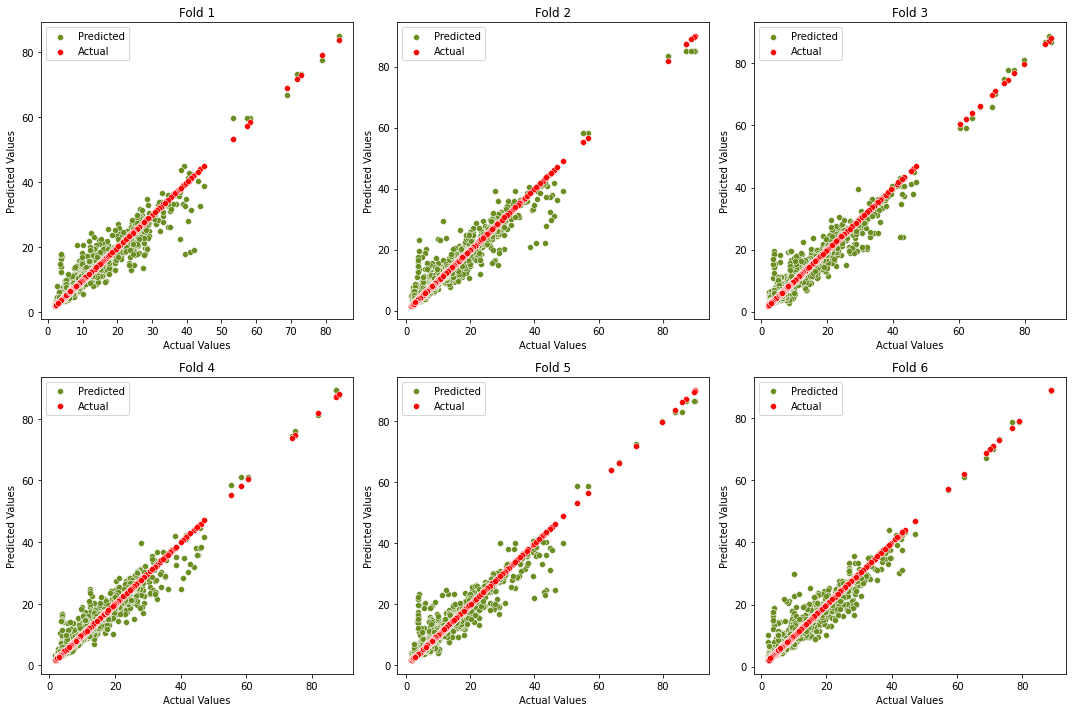

In [41]:
# Model 1: K  Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  


# Defining features and target
features = ['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders', 'DALYs', 'Year']
target = 'Deaths(Self-harm)'

X = merged_df[features]
y = merged_df[target]

# Standardizing your features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn_regressor = KNeighborsRegressor(n_neighbors=5) 
cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=1)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

# Lists to store RMSE and R-squared scores for each fold
rmse_scores = []
r2_scores = []

# Performing cross-validation and create scatter plots for each fold
for i, (train_index, test_index) in enumerate(cv.split(X_scaled)):
    if i >= len(axes):
        break 
    
    ax = axes[i]
    
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='olivedrab', label='Predicted')
    sns.scatterplot(x=y_test, y=y_test, ax=ax, color='red', label='Actual')
    
    ax.set_title(f'Fold {i+1}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
print("Cross-Validation Results of KNN:")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R-squared: {np.mean(r2_scores)}")

plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/kfold_knn.png')

plt.show();


Cross-Validation Results:
RMSE Scores: [0.950170852317743, 0.9300492322977324, 0.9961045550942744, 1.472075792449653, 0.7709571545730523]
Mean RMSE: 1.0238715173464912
R-squared Scores: [0.9877357048645979, 0.9897712793450293, 0.9844748952533768, 0.9721741054978577, 0.9919394565585068]
Mean R-squared: 0.9852190883038737


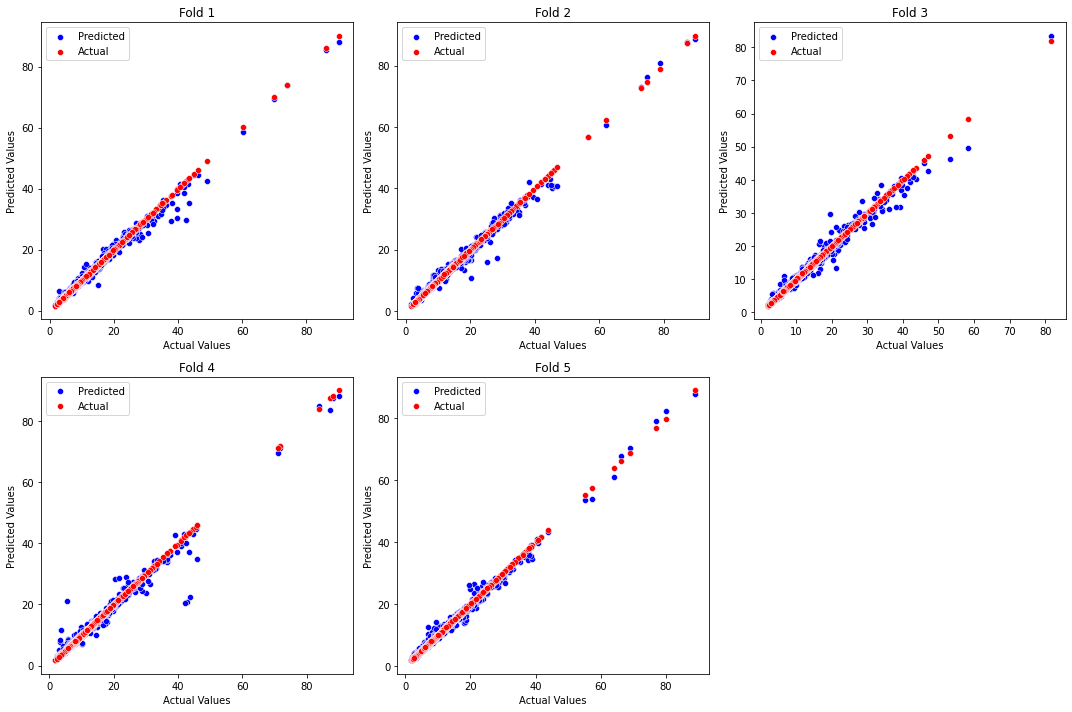

In [37]:
#final model, model 2 : random forest

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# target and features are already defined
# Creating a Random Forest Regression model
model_RF = RandomForestRegressor(n_estimators=100 ,min_samples_leaf=2,random_state=42)

X = merged_df[features]
y = merged_df[target]

# Performing k-fold cross-validation with k=5 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

rmse_scores = []
r2_scores = []

# Performing cross-validation and create scatter plots for each fold
for i, (train_index, test_index) in enumerate(kf.split(X)):
    ax = axes[i]  # Get the current subplot
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_RF.fit(X_train, y_train)
    y_pred = model_RF.predict(X_test)
    
    # Scatter plot of Predicted vs. Actual values
    sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='blue', label='Predicted')
    sns.scatterplot(x=y_test, y=y_test, ax=ax, color='red', label='Actual')
    
    ax.set_title(f'Fold {i+1}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

fig.delaxes(axes[5])


mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print("Cross-Validation Results:")
print(f"RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {mean_rmse}")
print(f"R-squared Scores: {r2_scores}")
print(f"Mean R-squared: {mean_r2}")

plt.tight_layout()
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/random_fo.png')
plt.show();


Cross-Validation Results:
RMSE Scores: [2.995825650470542, 3.183240847277967, 3.4214394441446494, 3.295058058776374, 2.885866059474102]
Mean RMSE: 3.1562860120287266
R-squared Scores: [0.8780807575757199, 0.8801747236978605, 0.8168350370203015, 0.860583256351769, 0.8870578170086105]
Mean R-squared: 0.8645463183308524


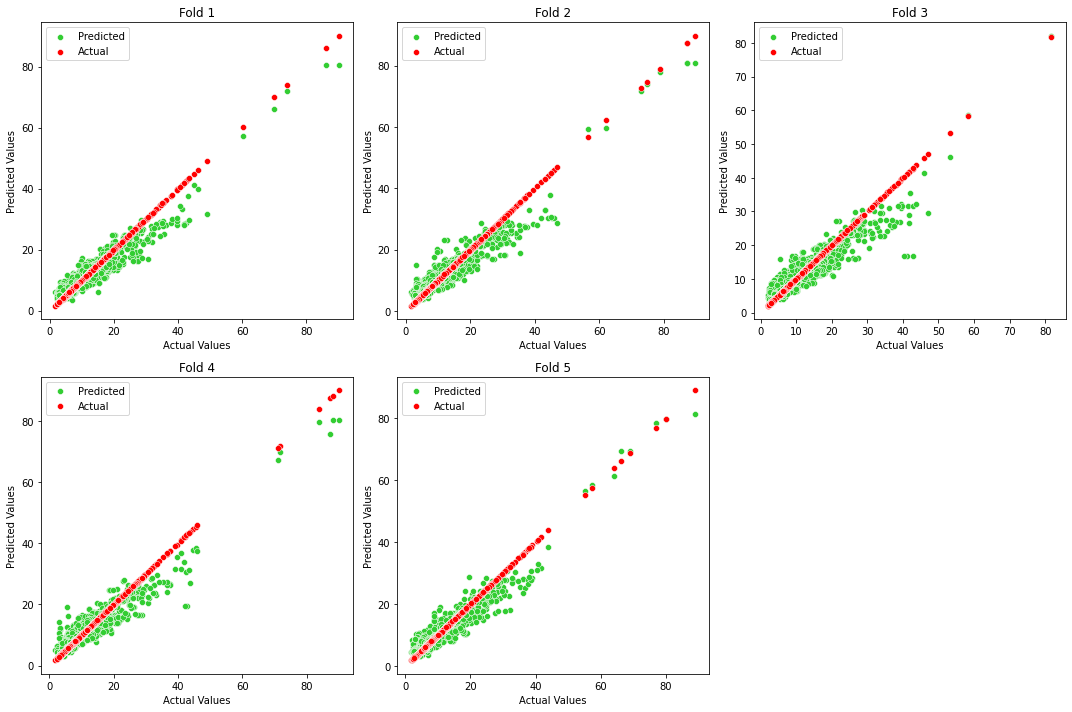

In [38]:
#model 3 Gradient boost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

#target and features are already defined in model 1

model_GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

X = merged_df[features]
y = merged_df[target]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

# Performing cross-validation and create scatter plots for each fold
for i, (train_index, test_index) in enumerate(kf.split(X)):
    ax = axes[i]  # Get the current subplot
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_GB.fit(X_train, y_train)
    y_pred = model_GB.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = (mse ** 0.5)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Scatter plot of Predicted vs. Actual values
    sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='limegreen', label='Predicted')
    sns.scatterplot(x=y_test, y=y_test, ax=ax, color='red', label='Actual')
    
    ax.set_title(f'Fold {i+1}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

fig.delaxes(axes[-1])

plt.tight_layout()

plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/kfold_grad_boost.png')

print("Cross-Validation Results:")
print(f"RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {sum(rmse_scores) / len(rmse_scores)}")
print(f"R-squared Scores: {r2_scores}")
print(f"Mean R-squared: {sum(r2_scores) / len(r2_scores)}")

plt.show();


Cross-Validation Results:
RMSE Scores: [2.995825650470542, 3.183240847277967, 3.4214394441446494, 3.295058058776374, 2.885866059474102]
Mean RMSE: 1.0238715173464912
R-squared Scores: [0.8780807575757199, 0.8801747236978605, 0.8168350370203015, 0.860583256351769, 0.8870578170086105]
Mean R-squared: 0.9852190883038737


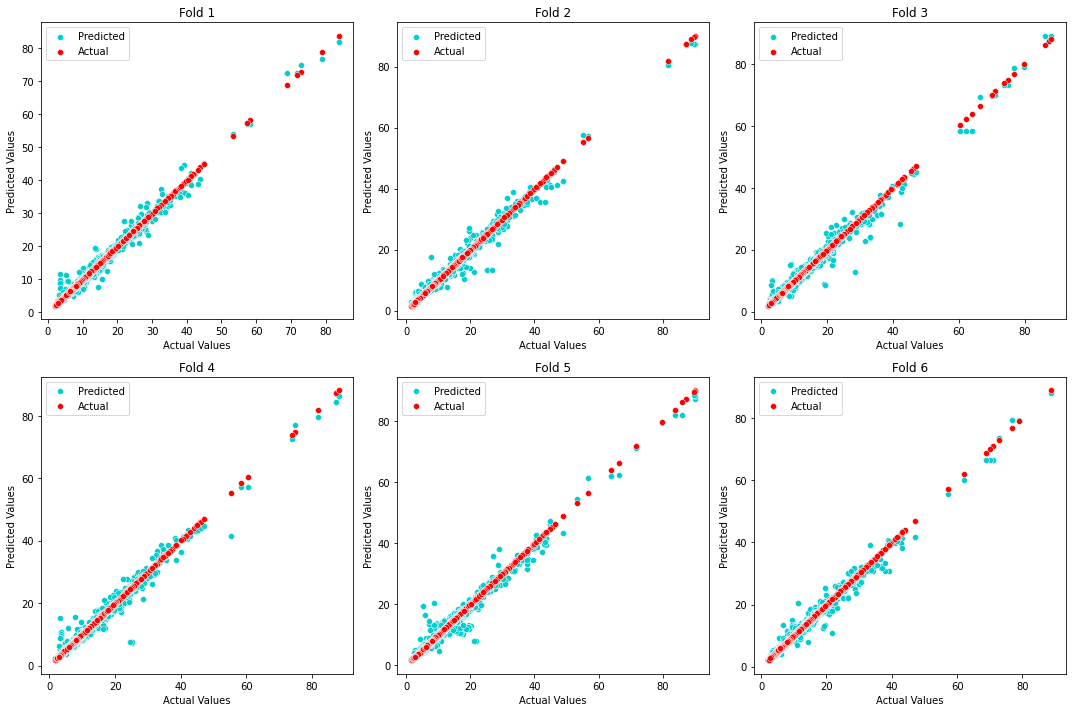

In [39]:
# model 4 : xgboost

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

X1 = merged_df[features]
y1 = merged_df[target]

# Defining the XGBoost model
mod_XGB = XGBRegressor(max_depth=10)

cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=1)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

# Performing cross-validation and create scatter plots for each fold
for i, (train_index, test_index) in enumerate(cv.split(X1)):
    if i >= len(axes):
        break 
    
    ax = axes[i] 
    
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    mod_XGB.fit(X_train, y_train)
    y_pred = mod_XGB .predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = (mse ** 0.5)
    r2 = r2_score(y_test, y_pred)
    
    # Scatter plot 
    sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='darkturquoise', label='Predicted')
    sns.scatterplot(x=y_test, y=y_test, ax=ax, color='red', label='Actual')
    
    ax.set_title(f'Fold {i+1}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/kfold_xgboost.png')


print("Cross-Validation Results:")
print(f"RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {mean_rmse}")
print(f"R-squared Scores: {r2_scores}")
print(f"Mean R-squared: {mean_r2}")

plt.show();


<ipython-input-40-17481718612a>:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasRegressor(build_fn=create_neural_network_model, epochs=100, batch_size=32, verbose=0)


Cross-Validation Results:
Mean RMSE: 2.387583013898257
Mean R-squared: 0.9226211375763818


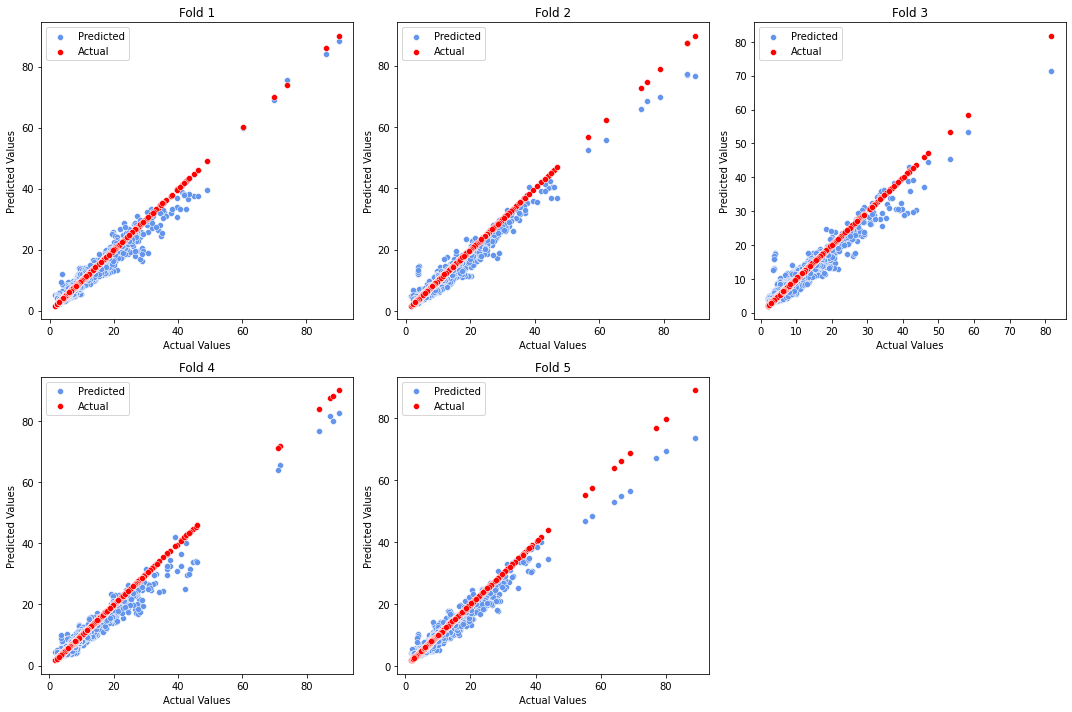

In [40]:
#model 5: neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from keras.wrappers.scikit_learn import KerasRegressor

#  features and target
features = ['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders', 'DALYs', 'Year']
target = 'Deaths(Self-harm)'

scaler = StandardScaler()
X = scaler.fit_transform(merged_df[features])
y = merged_df[target]

def create_neural_network_model():
    model = Sequential()
    model.add(Dense(units=64, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# KerasRegressor for cross-validation
neural_network = KerasRegressor(build_fn=create_neural_network_model, epochs=100, batch_size=32, verbose=0)

# Performing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store MSE and R2
rmse_scores = [] 
r2_scores = []

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Performing cross-validation and create scatter plots for each fold
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    if i >= len(axes):
        break  
    
    ax = axes[i] 
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    neural_network.fit(X_train, y_train)
    y_pred = neural_network.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = (mse ** 0.5)
    r2 = r2_score(y_test, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)

    sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='cornflowerblue', label='Predicted')
    sns.scatterplot(x=y_test, y=y_test, ax=ax, color='red', label='Actual')
    
    ax.set_title(f'Fold {i+1}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()

mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print("Cross-Validation Results:")
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean R-squared: {mean_r2}")

plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/kfold_neural.png')

plt.show();






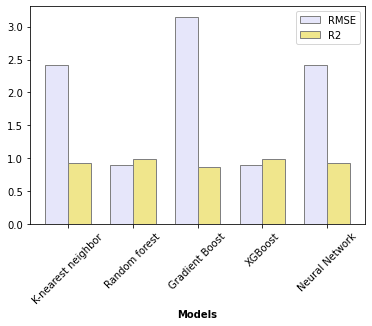

In [52]:

#creating graph to compare performnace of all models
models = ['K-nearest neighbor', 'Random forest', 'Gradient Boost', 'XGBoost', 'Neural Network']

# RMSE and R2 values
rmse_values = [2.41, 0.90, 3.15, 0.90, 2.42]
r2_values = [0.92, 0.99, 0.86, 0.99, 0.92]

bar_width = 0.35

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# stacked bar graph
plt.bar(r1, rmse_values, color='lavender', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar(r2, r2_values, color='khaki', width=bar_width, edgecolor='grey', label='R2')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models,rotation=45)
plt.legend()

plt.savefig('C:/Users/Lithium/Downloads/mental health/figures/mod_per.png')
plt.show();


